- Nombre: Marcus Alexander Mayorga Martínez
- Fecha: 25 de mayo del 2025
- Paralelo: 2do A

In [32]:
import numpy as np
import matplotlib.pyplot as plt #Para graficar
from PIL import Image #Para abrir imágenes
import requests #Para descargar imágenes
from io import BytesIO #Para abrir imágenes
from scipy.stats import chi2 #Para la distribución chi-cuadrado
import timeit #Para medir tiempos de ejecución

#Configuraciones para mejorar la visualización
np.set_printoptions(precision=4, suppress=True)

### 1er Ejercicio

In [33]:
#Generar matrices aleatorias A y B de 200x200
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)
print(f"Forma de A: {A.shape}, Forma de B: {B.shape}\n")

#a) Producto Hadamard (element-wise product)
#Se realiza con el operador * o np.multiply()
hadamard_product = A * B

#Opcionalmente: hadamard_product_np = np.multiply(A, B)
print("Primeros 5x5 del Producto Hadamard (A * B):")
print(hadamard_product[:5, :5], "\n")

#b) Producto punto (matrix multiplication)
#Se realiza con el operador @ o np.dot() o np.matmul()
dot_product = A @ B

print("Primeros 5x5 del Producto Punto (A @ B):")
print(dot_product[:5, :5], "\n")

#c) Comparación de tiempos con timeit
setup_code = """
import numpy as np
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)
"""

time_hadamard = timeit.timeit("A * B", setup=setup_code, number=1000)
time_dot = timeit.timeit("A @ B", setup=setup_code, number=1000)

print(f"Tiempo promedio para Producto Hadamard (1000 ejecuciones): {time_hadamard / 1000:.8f} segundos")
print(f"Tiempo promedio para Producto Punto (1000 ejecuciones): {time_dot / 1000:.8f} segundos")

if time_dot > time_hadamard:
    print(f"El producto punto fue {time_dot/time_hadamard:.2f} veces más lento que el producto Hadamard.")
else:
    print(f"El producto Hadamard fue {time_hadamard/time_dot:.2f} veces más lento que el producto punto.")
print("\n")

Forma de A: (200, 200), Forma de B: (200, 200)

Primeros 5x5 del Producto Hadamard (A * B):
[[0.0316 0.132  0.0138 0.1921 0.2433]
 [0.3685 0.4031 0.4315 0.0276 0.2889]
 [0.0874 0.2192 0.1834 0.2224 0.4051]
 [0.6895 0.2336 0.0729 0.1495 0.1442]
 [0.0139 0.1145 0.129  0.1871 0.6718]] 

Primeros 5x5 del Producto Punto (A @ B):
[[49.5748 42.1597 46.8246 46.3921 49.4943]
 [55.0102 46.6667 54.055  48.2266 52.2938]
 [51.0843 46.1521 52.1337 46.3646 48.9247]
 [50.5322 44.6657 49.9587 47.1677 51.4916]
 [49.7809 43.762  49.7076 48.203  48.3514]] 

Tiempo promedio para Producto Hadamard (1000 ejecuciones): 0.00002424 segundos
Tiempo promedio para Producto Punto (1000 ejecuciones): 0.00247586 segundos
El producto punto fue 102.16 veces más lento que el producto Hadamard.




### 2do Ejercicio

In [34]:
def frobenius_norm(matrix):
    #Norma de Frobenius = sqrt(sum(abs(element_ij)^2))
    #Usamos np.abs() para el caso de matrices complejas
    return np.sqrt(np.sum(np.abs(matrix)**2))

def infinity_norm_matrix(matrix):
    #Norma infinito = max_i (sum_j |a_ij|)
    #np.sum(np.abs(matrix), axis=1) suma los valores absolutos a lo largo de las filas.
    return np.max(np.sum(np.abs(matrix), axis=1))

#Prueba con distintas matrices
matrices_prueba = {
    "Matriz A (del Ej. 1)": A,
    "Matriz Identidad 3x3": np.eye(3),
    "Matriz Aleatoria 3x4": np.random.randint(-10, 10, size=(3,4))
}

for nombre, M_test in matrices_prueba.items():
    print(f"\nProbando con: {nombre}")
    print("Matriz:")

    #Condicional para imprimir solo una parte si es muy grande
    if M_test.shape[0] > 5 or M_test.shape[1] > 5:
        print(M_test[:3,:3], "...\n")
    else:
        print(M_test, "\n")

    #Norma de Frobenius
    norm_frob_custom = frobenius_norm(M_test)
    norm_frob_numpy = np.linalg.norm(M_test, 'fro')
    print(f"Norma de Frobenius (custom): {norm_frob_custom:.4f}")
    print(f"Norma de Frobenius (numpy):  {norm_frob_numpy:.4f}")
    print(f"Verificación exitosa: {np.isclose(norm_frob_custom, norm_frob_numpy)}\n")

    #Norma Infinita
    norm_inf_custom = infinity_norm_matrix(M_test)
    norm_inf_numpy = np.linalg.norm(M_test, np.inf)
    print(f"Norma Infinita (custom): {norm_inf_custom:.4f}")
    print(f"Norma Infinita (numpy):  {norm_inf_numpy:.4f}")
    print(f"Verificación exitosa: {np.isclose(norm_inf_custom, norm_inf_numpy)}\n")


Probando con: Matriz A (del Ej. 1)
Matriz:
[[0.2309 0.232  0.0151]
 [0.6653 0.9802 0.7154]
 [0.1707 0.4285 0.4548]] ...

Norma de Frobenius (custom): 115.5268
Norma de Frobenius (numpy):  115.5268
Verificación exitosa: True

Norma Infinita (custom): 111.4716
Norma Infinita (numpy):  111.4716
Verificación exitosa: True


Probando con: Matriz Identidad 3x3
Matriz:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Norma de Frobenius (custom): 1.7321
Norma de Frobenius (numpy):  1.7321
Verificación exitosa: True

Norma Infinita (custom): 1.0000
Norma Infinita (numpy):  1.0000
Verificación exitosa: True


Probando con: Matriz Aleatoria 3x4
Matriz:
[[ -8  -1  -2   7]
 [ -6   2   6 -10]
 [ -3   1  -1   1]] 

Norma de Frobenius (custom): 17.4929
Norma de Frobenius (numpy):  17.4929
Verificación exitosa: True

Norma Infinita (custom): 24.0000
Norma Infinita (numpy):  24.0000
Verificación exitosa: True



### 3er Ejercicio

Usando N = 5 y bk = [1. 1. 1. 1. 1.]

k | Cond(Ak)     | Norma de xk
------------------------------------
 1 |   6.0000e+00 | 3.7268e-01
 2 |   1.1000e+01 | 2.0328e-01
 3 |   1.6000e+01 | 1.3975e-01
 4 |   2.1000e+01 | 1.0648e-01
 5 |   2.6000e+01 | 8.6003e-02
 6 |   3.1000e+01 | 7.2131e-02
 7 |   3.6000e+01 | 6.2113e-02
 8 |   4.1000e+01 | 5.4538e-02
 9 |   4.6000e+01 | 4.8610e-02
10 |   5.1000e+01 | 4.3844e-02
11 |   5.6000e+01 | 3.9930e-02
12 |   6.1000e+01 | 3.6657e-02
13 |   6.6000e+01 | 3.3880e-02
14 |   7.1000e+01 | 3.1494e-02
15 |   7.6000e+01 | 2.9422e-02
16 |   8.1000e+01 | 2.7606e-02
17 |   8.6000e+01 | 2.6001e-02
18 |   9.1000e+01 | 2.4572e-02
19 |   9.6000e+01 | 2.3292e-02
20 |   1.0100e+02 | 2.2139e-02


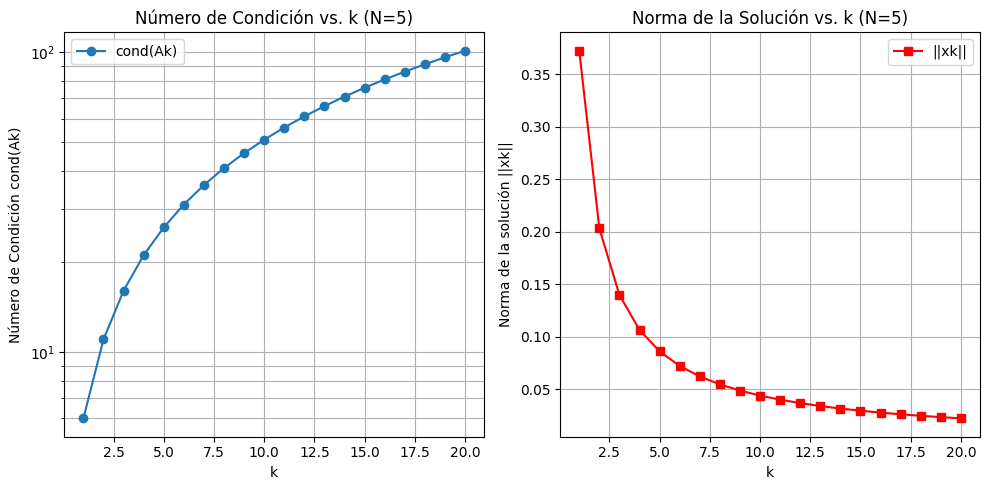

In [35]:
#Definir el tamaño de las matrices (N x N)
N = 5
I = np.eye(N)
J = np.ones((N, N))

#Definir un vector bk
bk_example = np.ones(N)

# bk_example = np.arange(1, N + 1)
# bk_example = np.random.rand(N)
print(f"Usando N = {N} y bk = {bk_example}\n")

k_values = np.arange(1, 21)
condition_numbers = []

#Observamos cómo cambian las soluciones
solutions_norms = []

print("k | Cond(Ak)     | Norma de xk")
print("------------------------------------")

for k_val in k_values:

    #Construir Ak
    Ak = I + k_val * J

    #a) Resolver Ak x = bk
    try:
        xk = np.linalg.solve(Ak, bk_example)
        solutions_norms.append(np.linalg.norm(xk))
    except np.linalg.LinAlgError:
        print(f"k={k_val}: Sistema singular, no se puede resolver.")
        xk = np.full(N, np.nan) #Marcar como no resuelto
        solutions_norms.append(np.nan)


    #b) Calcular el número de condición de Ak
    cond_Ak = np.linalg.cond(Ak)
    condition_numbers.append(cond_Ak)

    print(f"{k_val:2} | {cond_Ak:12.4e} | {np.linalg.norm(xk):.4e}")

#Graficar k vs. número de condición
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, condition_numbers, 'o-', label='cond(Ak)')
plt.xlabel('k')
plt.ylabel('Número de Condición cond(Ak)')
plt.title(f'Número de Condición vs. k (N={N})')
plt.yscale('log') #Es común que los números de condición crezcan mucho
plt.grid(True, which="both", ls="-")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, solutions_norms, 's-', label='||xk||', color='red')
plt.xlabel('k')
plt.ylabel('Norma de la solución ||xk||')
plt.title(f'Norma de la Solución vs. k (N={N})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 4to Ejercicio

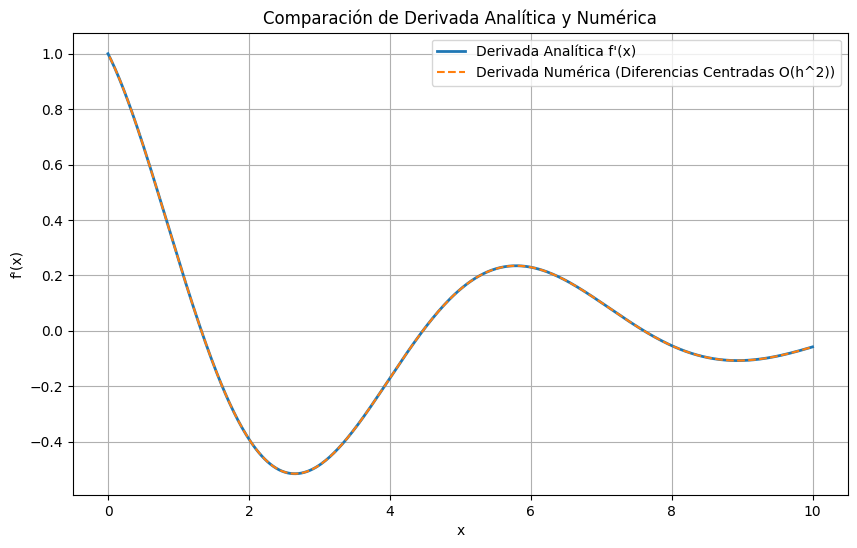

Intervalo: [0, 10], Puntos: 500, h: 0.0200
Error Absoluto Medio (puntos interiores): 1.58e-05
Para num_points = 50, h: 0.2041, MAE (interiores): 1.61e-03


In [36]:
#Definir la función f(x)
def f(x):
    return np.sin(x) * np.exp(-x / 4)

#Definir la derivada analítica f'(x)
#f'(x) = cos(x) * e^(-x/4) + sin(x) * (-1/4) * e^(-x/4)
#f'(x) = e^(-x/4) * (cos(x) - (1/4)sin(x))
def f_prime_analytical(x):
    return np.exp(-x / 4) * (np.cos(x) - 0.25 * np.sin(x))

#Parámetros del problema
x_min, x_max = 0, 10
num_points = 500
x_values = np.linspace(x_min, x_max, num_points)

#Crear un espaciado constante
h = x_values[1] - x_values[0]

#Calcular f(x) en los puntos
y_values = f(x_values)

#Aproximar f'(x) usando diferencias centradas de orden 2
#f'(xi) approx (f(xi+h) - f(xi-h)) / (2h)
#Esto significa y_prime[i] = (y_values[i+1] - y_values[i-1]) / (2*h)
f_prime_numerical = np.zeros(num_points)

#Para los puntos interiores
f_prime_numerical[1:-1] = (y_values[2:] - y_values[:-2]) / (2 * h)

#Diferencia hacia adelante O(h) para el primer punto: (y_values[1] - y_values[0]) / h
f_prime_numerical[0] = (y_values[1] - y_values[0]) / h

#Diferencia hacia atrás O(h) para el último punto: (y_values[-1] - y_values[-2]) / h
f_prime_numerical[-1] = (y_values[-1] - y_values[-2]) / h

#Calcular la derivada analítica en los puntos
f_prime_exact = f_prime_analytical(x_values)

#Comparar gráficamente
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_prime_exact, label="Derivada Analítica f'(x)", linewidth=2)

#Graficamos la numérica solo para los puntos donde la diferencia centrada es válida
plt.plot(x_values[1:-1], f_prime_numerical[1:-1], '--', label="Derivada Numérica (Diferencias Centradas O(h^2))", markersize=3)

plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Comparación de Derivada Analítica y Numérica")
plt.legend()
plt.grid(True)
plt.show()

#Calcular el error
mae = np.mean(np.abs(f_prime_exact[1:-1] - f_prime_numerical[1:-1]))
print(f"Intervalo: [{x_min}, {x_max}], Puntos: {num_points}, h: {h:.4f}")
print(f"Error Absoluto Medio (puntos interiores): {mae:.2e}")

#Prueba con distintos datos:
x_values_50 = np.linspace(x_min, x_max, 50)
h_50 = x_values_50[1] - x_values_50[0]
y_values_50 = f(x_values_50)
f_prime_numerical_50 = np.zeros(50)
f_prime_numerical_50[1:-1] = (y_values_50[2:] - y_values_50[:-2]) / (2 * h_50)
f_prime_exact_50 = f_prime_analytical(x_values_50)
mae_50 = np.mean(np.abs(f_prime_exact_50[1:-1] - f_prime_numerical_50[1:-1]))
print(f"Para num_points = 50, h: {h_50:.4f}, MAE (interiores): {mae_50:.2e}")

### 5to Ejercicio

In [37]:
#Debe ser impar para Simpson (N-1 intervalos, N par)
num_points_integration = 501
x_integration = np.linspace(x_min, x_max, num_points_integration)
y_integration = f(x_integration)
h_integration = x_integration[1] - x_integration[0]


#a) Regla del trapecio vectorizada
def trapezoidal_rule_vectorized(y_vals, h_step):
    return h_step * (0.5 * y_vals[0] + np.sum(y_vals[1:-1]) + 0.5 * y_vals[-1])

#b) Regla de Simpson vectorizada
#Asume un número par de intervalos, es decir, un número impar de puntos (y_vals).
def simpson_rule_vectorized(y_vals, h_step):
    if len(y_vals) % 2 == 0:
        print("Advertencia: Regla de Simpson funciona mejor con un número impar de puntos (par de intervalos).")

    # Suma de términos impares (4*f(xi)) y pares (2*f(xi))
    return (h_step / 3) * (y_vals[0] + 4 * np.sum(y_vals[1:-1:2]) + 2 * np.sum(y_vals[2:-2:2]) + y_vals[-1])

#c) Aplicar y estimar error
#Integral analítica de f(x) = sin(x)e^(-x/4)
#∫ sin(x)e^(-x/4) dx = (e^(-x/4) / (1 + 1/16)) * (-1/4 sin(x) - cos(x))
#= (16/17) * e^(-x/4) * (-1/4 sin(x) - cos(x))
def F_analytical(x): # Primitiva
    return (16/17) * np.exp(-x/4) * (-0.25 * np.sin(x) - np.cos(x))

integral_exacta_val = F_analytical(x_max) - F_analytical(x_min)

#Aplicar métodos
integral_trapecio = trapezoidal_rule_vectorized(y_integration, h_integration)
integral_simpson = simpson_rule_vectorized(y_integration, h_integration)

#Comparar con np.trapz y scipy.integrate.simpson
#from scipy.integrate import simpson as simpson_scipy para verificar
integral_trapecio_numpy = np.trapezoid(y_integration, x=x_integration)

print(f"Intervalo: [{x_min}, {x_max}], Puntos para integración: {num_points_integration}, h: {h_integration:.4f}")
print(f"Integral Exacta:                           {integral_exacta_val:.8f}")
print(f"Integral Trapecio (custom):                {integral_trapecio:.8f}")
print(f"Integral Trapecio (numpy.trapz):           {integral_trapecio_numpy:.8f}")
print(f"Integral Simpson (custom):                 {integral_simpson:.8f}")

#Errores
error_trapecio = np.abs(integral_trapecio - integral_exacta_val)
error_simpson = np.abs(integral_simpson - integral_exacta_val)
print(f"\nError Absoluto Trapecio: {error_trapecio:.2e}")
print(f"Error Absoluto Simpson:  {error_simpson:.2e}")

#Prueba con menos puntos
num_points_test = 21
x_test = np.linspace(x_min, x_max, num_points_test)
y_test = f(x_test)
h_test = x_test[1] - x_test[0]

integral_trapecio_test = trapezoidal_rule_vectorized(y_test, h_test)
integral_simpson_test = simpson_rule_vectorized(y_test, h_test)
error_trapecio_test = np.abs(integral_trapecio_test - integral_exacta_val)
error_simpson_test = np.abs(integral_simpson_test - integral_exacta_val)

print(f"\nCon {num_points_test} puntos (h={h_test:.4f}):")
print(f"  Error Trapecio: {error_trapecio_test:.2e}")
print(f"  Error Simpson:  {error_simpson_test:.2e}")

Intervalo: [0, 10], Puntos para integración: 501, h: 0.0200
Integral Exacta:                           1.01650746
Integral Trapecio (custom):                1.01647220
Integral Trapecio (numpy.trapz):           1.01647220
Integral Simpson (custom):                 1.01650746

Error Absoluto Trapecio: 3.53e-05
Error Absoluto Simpson:  7.43e-10

Con 21 puntos (h=0.5000):
  Error Trapecio: 2.21e-02
  Error Simpson:  2.94e-04


### 6to Ejercicio

Señal de prueba: senoidal de 10.0 Hz y 25.0 Hz.
Frecuencia esperada en bin: 10 y 25
DFT custom y np.fft.fft son cercanas: True


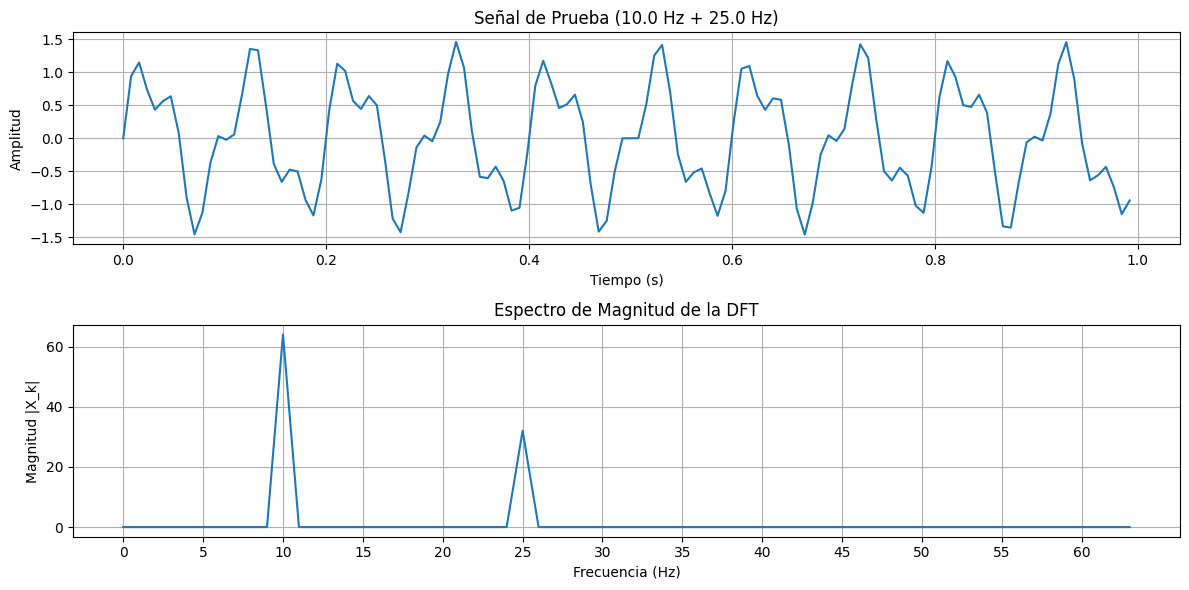

In [38]:
def dft_matrix(signal):
    N = len(signal)
    n_indices = np.arange(N)
    k_indices = n_indices.reshape((N, 1))

    #Matriz de exponenciales de Fourier W_kn = exp(-2j * pi * k * n / N)
    #Usamos broadcasting: k_indices * n_indices crea una matriz N x N donde M_kn = k*n
    W_matrix_exponent = -2j * np.pi * k_indices * n_indices / N
    W_matrix = np.exp(W_matrix_exponent)

    dft_coeffs = W_matrix @ signal
    return dft_coeffs

#Parámetros de la señal de prueba
N_samples = 128 #Número de muestras
sampling_rate = 128 #Muestras por segundo (Hz), para que las freqs sean enteras
T_duration = N_samples / sampling_rate #Duración total de la señal
t = np.linspace(0, T_duration, N_samples, endpoint=False) #Vector de tiempo

#Señal senoidal pura: f(t) = A * sin(2*pi*f0*t)
amplitude = 1.0
frequency_hz = 10.0 #Frecuencia de la señal en Hz

test_signal = amplitude * np.sin(2 * np.pi * frequency_hz * t)

#Nueva frecuencia para la segunda señal
frequency_hz_2 = 25.0
test_signal += 0.5 * np.sin(2 * np.pi * frequency_hz_2 * t)


#Calcular DFT
dft_result = dft_matrix(test_signal)
dft_numpy = np.fft.fft(test_signal) #Comparar con la DFT de NumPy

#Las frecuencias correspondientes a los coeficientes de la DFT
frequencies = np.fft.fftfreq(N_samples, d=1/sampling_rate)

#Magnitud del espectro
magnitude_spectrum = np.abs(dft_result)

print(f"Señal de prueba: senoidal de {frequency_hz} Hz y {frequency_hz_2} Hz.")
print(f"Frecuencia esperada en bin: {int(frequency_hz * T_duration)} y {int(frequency_hz_2 * T_duration)}")

#Verificar si nuestra DFT es cercana a la de NumPy
print(f"DFT custom y np.fft.fft son cercanas: {np.allclose(dft_result, dft_numpy)}")

#Graficar la señal y su espectro
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, test_signal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal de Prueba ({frequency_hz} Hz + {frequency_hz_2} Hz)")
plt.grid(True)

plt.subplot(2, 1, 2)

freq_bins = np.arange(N_samples) * (sampling_rate / N_samples)
plt.plot(freq_bins[:N_samples//2], magnitude_spectrum[:N_samples//2])
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud |X_k|")
plt.title("Espectro de Magnitud de la DFT")
plt.xticks(np.arange(0, sampling_rate/2 + 1, 5)) #Marcas cada 5 Hz
plt.grid(True)

plt.tight_layout()
plt.show()

### 7mo Ejercicio

In [39]:
#Parámetros verdaderos
mu_true = 2.5
sigma_true = 1.3
num_samples = 10000

#Simular muestras
samples = np.random.normal(loc=mu_true, scale=sigma_true, size=num_samples)

#Estimación de μ (media muestral) con fórmula vectorizada
#mu_est = (1/N) * sum(x_i)
mu_estimated = np.sum(samples) / num_samples

#Estimación de σ² (varianza muestral) con fórmula vectorizada
#sigma_sq_est = (1/N) * sum((x_i - mu_est)^2)  (MLE para varianza, o dividiendo por N-1 para insesgada)
#Usamos la definición de np.var que por defecto divide por N (MLE)
variance_estimated_mle = np.sum((samples - mu_estimated)**2) / num_samples

#Estimador insesgado de la varianza (divide por N-1)
variance_estimated_unbiased = np.sum((samples - mu_estimated)**2) / (num_samples - 1)


#Comparación con funciones de NumPy
mu_numpy = np.mean(samples)
variance_numpy_mle = np.var(samples)
variance_numpy_unbiased = np.var(samples, ddof=1)

print(f"Parámetros verdaderos: μ = {mu_true}, σ = {sigma_true}, σ² = {sigma_true**2:.4f}")
print(f"Número de muestras: {num_samples}\n")

print("Estimación de μ:")
print(f"  Fórmula vectorizada: {mu_estimated:.4f}")
print(f"  np.mean:             {mu_numpy:.4f}")
print(f"  Cercanos: {np.isclose(mu_estimated, mu_numpy)}\n")

print("Estimación de σ² (MLE, divisor N):")
print(f"  Fórmula vectorizada (usando mu_estimated): {variance_estimated_mle:.4f}")
print(f"  np.var (ddof=0):                         {variance_numpy_mle:.4f}")
# Pequeña diferencia si se usa mu_estimated vs mu_numpy internamente por np.var
# np.var(samples) usa el mu_numpy calculado internamente.
# Para ser exactos, la fórmula debe usar el mu_estimated para ser comparable con la fórmula.
variance_numpy_mle_check = np.sum((samples - np.mean(samples))**2) / num_samples
print(f"  Cercanos (fórmula vs np.var): {np.isclose(variance_estimated_mle, variance_numpy_mle_check)}") # Deberían ser muy cercanos
print(f"  (np.var usa su propio cálculo de la media internamente)\n")


print("Estimación de σ² (Insesgada, divisor N-1):")
print(f"  Fórmula vectorizada (usando mu_estimated): {variance_estimated_unbiased:.4f}")
print(f"  np.var (ddof=1):                         {variance_numpy_unbiased:.4f}")
variance_numpy_unbiased_check = np.sum((samples - np.mean(samples))**2) / (num_samples -1)
print(f"  Cercanos (fórmula vs np.var con ddof=1): {np.isclose(variance_estimated_unbiased, variance_numpy_unbiased_check)}")
print("\n")

#Prueba con menos muestras para ver mayor variabilidad
num_samples_small = 100
samples_small = np.random.normal(loc=mu_true, scale=sigma_true, size=num_samples_small)
mu_est_small = np.sum(samples_small) / num_samples_small
var_est_small_mle = np.sum((samples_small - mu_est_small)**2) / num_samples_small
print(f"Con {num_samples_small} muestras:")
print(f"  μ estimada: {mu_est_small:.4f} (np.mean: {np.mean(samples_small):.4f})")
print(f"  σ² estimada (MLE): {var_est_small_mle:.4f} (np.var: {np.var(samples_small):.4f})")

Parámetros verdaderos: μ = 2.5, σ = 1.3, σ² = 1.6900
Número de muestras: 10000

Estimación de μ:
  Fórmula vectorizada: 2.4914
  np.mean:             2.4914
  Cercanos: True

Estimación de σ² (MLE, divisor N):
  Fórmula vectorizada (usando mu_estimated): 1.6972
  np.var (ddof=0):                         1.6972
  Cercanos (fórmula vs np.var): True
  (np.var usa su propio cálculo de la media internamente)

Estimación de σ² (Insesgada, divisor N-1):
  Fórmula vectorizada (usando mu_estimated): 1.6974
  np.var (ddof=1):                         1.6974
  Cercanos (fórmula vs np.var con ddof=1): True


Con 100 muestras:
  μ estimada: 2.7457 (np.mean: 2.7457)
  σ² estimada (MLE): 1.7069 (np.var: 1.7069)


### 8vo Ejercicio

Datos originales: 500 muestras de Chi^2(df=4)
Mediana de los datos originales: 3.4736

Se generaron 2000 remuestras bootstrap.
Intervalo de confianza del 95% para la mediana (método de percentiles):
  [3.1663, 3.8179]
Mediana teórica de Chi^2(df=4): 3.3567
La mediana teórica está dentro del intervalo de confianza bootstrap.


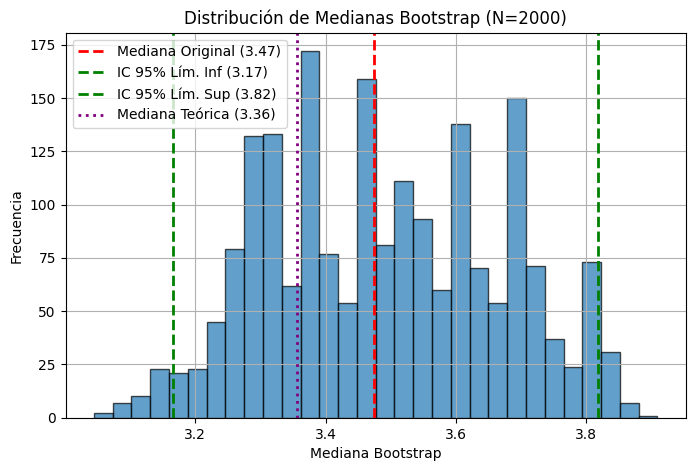

In [40]:
#Grados de libertad para la chi-cuadrado
df = 4
num_original_samples = 500

#Generar datos originales de una chi-cuadrado
original_data = np.random.chisquare(df, size=num_original_samples)
median_original_data = np.median(original_data)
print(f"Datos originales: {num_original_samples} muestras de Chi^2(df={df})")
print(f"Mediana de los datos originales: {median_original_data:.4f}\n")

#a) Generar remuestras bootstrap
num_bootstrap_samples = 2000
bootstrap_medians = np.zeros(num_bootstrap_samples)

#Bucle para generar cada remuestra bootstrap
for i in range(num_bootstrap_samples):

    #Remuestrear CON REEMPLAZO de los datos originales
    #np.random.choice toma 'a' (el array del que muestrear), 'size' y 'replace'
    resample = np.random.choice(original_data, size=num_original_samples, replace=True)
    bootstrap_medians[i] = np.median(resample)

#b) Obtener el intervalo de confianza del 95% para la mediana
#Metodo de los percentiles.
alpha = 0.05 # Nivel de significancia
lower_bound = np.percentile(bootstrap_medians, 100 * (alpha / 2))
upper_bound = np.percentile(bootstrap_medians, 100 * (1 - alpha / 2))

print(f"Se generaron {num_bootstrap_samples} remuestras bootstrap.")
print(f"Intervalo de confianza del 95% para la mediana (método de percentiles):")
print(f"  [{lower_bound:.4f}, {upper_bound:.4f}]")

#Usando scipy.stats:
median_theoretical = chi2.median(df)
print(f"Mediana teórica de Chi^2(df={df}): {median_theoretical:.4f}")
if lower_bound <= median_theoretical <= upper_bound:
    print("La mediana teórica está dentro del intervalo de confianza bootstrap.")
else:
    print("La mediana teórica NO está dentro del intervalo de confianza bootstrap.")


#Visualizar la distribución de las medianas bootstrap
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(median_original_data, color='red', linestyle='dashed', linewidth=2, label=f'Mediana Original ({median_original_data:.2f})')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f'IC 95% Lím. Inf ({lower_bound:.2f})')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label=f'IC 95% Lím. Sup ({upper_bound:.2f})')
if median_theoretical is not None:
    plt.axvline(median_theoretical, color='purple', linestyle='dotted', linewidth=2, label=f'Mediana Teórica ({median_theoretical:.2f})')
plt.xlabel("Mediana Bootstrap")
plt.ylabel("Frecuencia")
plt.title(f"Distribución de Medianas Bootstrap (N={num_bootstrap_samples})")
plt.legend()
plt.grid(True)
plt.show()

### 9no Ejercicio

Número de puntos simulados: 10000

Covarianza Cov(X,Y):
  Cálculo manual: 3.0283
  np.cov(X,Y)[0,1]: 3.0283
  Cercanos: True

Coeficiente de Correlación de Pearson ρ(X,Y):
  Cálculo manual:   0.9862
  np.corrcoef(X,Y)[0,1]: 0.9862
  Cercanos: True

Valores teóricos esperados:
  Cov(X,Y) teórica: 3.0000
  ρ(X,Y) teórico:   0.9864


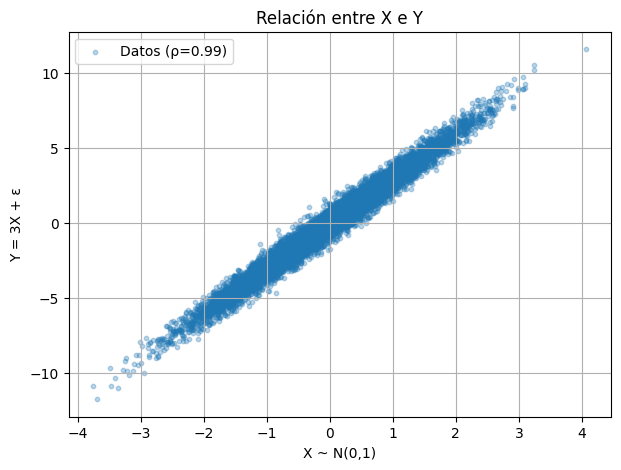

In [41]:
num_points_corr = 10000

#Simular X ~ N(0, 1)
X = np.random.normal(loc=0, scale=1, size=num_points_corr)

#Simular epsilon ~ N(0, 0.5^2) -> N(0, 0.25)
epsilon_std = 0.5
epsilon = np.random.normal(loc=0, scale=epsilon_std, size=num_points_corr)

#Calcular Y = 3X + epsilon
Y = 3 * X + epsilon

#Calcular medias de X e Y
mean_X = np.mean(X) # o np.sum(X) / num_points_corr
mean_Y = np.mean(Y) # o np.sum(Y) / num_points_corr

#Calcular covarianza entre X e Y sin usar np.cov
#Cov(X,Y) = E[(X - E[X])(Y - E[Y])] = (1/N) * sum((X_i - mean_X)(Y_i - mean_Y))
covariance_XY = np.sum((X - mean_X) * (Y - mean_Y)) / (num_points_corr - 1)

#Calcular varianzas de X e Y (necesarias para Pearson)
variance_X = np.sum((X - mean_X)**2) / (num_points_corr - 1) # np.var(X, ddof=1)
variance_Y = np.sum((Y - mean_Y)**2) / (num_points_corr - 1) # np.var(Y, ddof=1)

#Desviaciones estándar
std_dev_X = np.sqrt(variance_X)
std_dev_Y = np.sqrt(variance_Y)

#Calcular coeficiente de correlación de Pearson
#rho(X,Y) = Cov(X,Y) / (std_dev_X * std_dev_Y)
pearson_coeff = covariance_XY / (std_dev_X * std_dev_Y)

#Comparación con funciones de NumPy
#np.cov devuelve una matriz de covarianza: [[Cov(X,X), Cov(X,Y)], [Cov(Y,X), Cov(Y,Y)]]
cov_matrix_numpy = np.cov(X, Y)
covariance_XY_numpy = cov_matrix_numpy[0, 1]

#np.corrcoef devuelve una matriz de correlación
corr_matrix_numpy = np.corrcoef(X, Y)
pearson_coeff_numpy = corr_matrix_numpy[0, 1]

print(f"Número de puntos simulados: {num_points_corr}\n")
print("Covarianza Cov(X,Y):")
print(f"  Cálculo manual: {covariance_XY:.4f}")
print(f"  np.cov(X,Y)[0,1]: {covariance_XY_numpy:.4f}")
print(f"  Cercanos: {np.isclose(covariance_XY, covariance_XY_numpy)}\n")

print("Coeficiente de Correlación de Pearson ρ(X,Y):")
print(f"  Cálculo manual:   {pearson_coeff:.4f}")
print(f"  np.corrcoef(X,Y)[0,1]: {pearson_coeff_numpy:.4f}")
print(f"  Cercanos: {np.isclose(pearson_coeff, pearson_coeff_numpy)}\n")

cov_theoretical = 3 * 1
var_Y_theoretical = 9 * 1 + epsilon_std**2
pearson_theoretical = cov_theoretical / (np.sqrt(1) * np.sqrt(var_Y_theoretical))

print("Valores teóricos esperados:")
print(f"  Cov(X,Y) teórica: {cov_theoretical:.4f}")
print(f"  ρ(X,Y) teórico:   {pearson_theoretical:.4f}")

#Graficar para visualizar la relación
plt.figure(figsize=(7, 5))
plt.scatter(X, Y, alpha=0.3, s=10, label=f'Datos (ρ={pearson_coeff:.2f})')
plt.xlabel("X ~ N(0,1)")
plt.ylabel("Y = 3X + ε")
plt.title("Relación entre X e Y")
plt.grid(True)
plt.legend()
plt.show()

### 10mo Ejercicio

In [42]:
def classical_gram_schmidt(A):
    m, n = A.shape
    if m < n:
        raise ValueError("La matriz A debe tener al menos tantas filas como columnas.")

    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):  #Iterar sobre las columnas de A (a_j)
        v_j = A[:, j].copy()  #Copia de la columna j-ésima de A

        #Proceso de ortogonalización
        for i in range(j):
            R[i, j] = Q[:, i].T @ A[:, j]
            v_j -= R[i, j] * Q[:, i]

        #Normalización
        norm_v_j = np.linalg.norm(v_j)
        if norm_v_j < 1e-10:
            print(f"Advertencia: Columna {j} parece ser linealmente dependiente o norma muy pequeña ({norm_v_j}).")
            Q[:, j] = np.zeros(m)
            R[j, j] = 0
        else:
            Q[:, j] = v_j / norm_v_j
            R[j, j] = norm_v_j

    return Q, R

#Prueba con una matriz aleatoria
A_test_qr = np.array([[1, 1, 0],
                      [1, 0, 1],
                      [0, 1, 1],
                      [1, 1, 1],
                      [0, 0, 1]], dtype=float)

#Corregido: definir m_qr y n_qr
m_qr, n_qr = A_test_qr.shape

print("Matriz A de prueba (shape {}x{}):".format(m_qr, n_qr))
print(A_test_qr)

Q_gs, R_gs = classical_gram_schmidt(A_test_qr.copy())
Q_numpy, R_numpy = np.linalg.qr(A_test_qr)  #Comparar con la función QR de NumPy

print("\nMatriz Q (Gram-Schmidt):")
print(Q_gs)
print("\nMatriz R (Gram-Schmidt):")
print(R_gs)

#Verificaciones
QTQ_gs = Q_gs.T @ Q_gs
I_n = np.eye(n_qr)
print(f"\nVerificación Q.T @ Q ≈ I (Error: {np.linalg.norm(QTQ_gs - I_n):.2e}):")
print(QTQ_gs)
print(f"np.allclose(QTQ_gs, I_n): {np.allclose(QTQ_gs, I_n)}")

#Q @ R ≈ A
QR_gs = Q_gs @ R_gs
print(f"\nVerificación Q @ R ≈ A (Error: {np.linalg.norm(QR_gs - A_test_qr):.2e}):")
print(QR_gs)
print(f"np.allclose(QR_gs, A_test_qr): {np.allclose(QR_gs, A_test_qr)}")

#Comparación con np.linalg.qr
print("\nComparación con np.linalg.qr:")
print("Q (NumPy):")
print(Q_numpy)
print("R (NumPy):")
print(R_numpy)

#Prueba con una matriz cuadrada
A_square = np.random.rand(3, 3) * 10
Q_sq_gs, R_sq_gs = classical_gram_schmidt(A_square.copy())
print("\nPrueba con matriz cuadrada 3x3:")
print(f"Q.T @ Q es identidad: {np.allclose(Q_sq_gs.T @ Q_sq_gs, np.eye(3))}")
print(f"Q @ R es A: {np.allclose(Q_sq_gs @ R_sq_gs, A_square)}")

Matriz A de prueba (shape 5x3):
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]
 [1. 1. 1.]
 [0. 0. 1.]]

Matriz Q (Gram-Schmidt):
[[ 0.5774  0.2582 -0.5164]
 [ 0.5774 -0.5164  0.3873]
 [ 0.      0.7746  0.3873]
 [ 0.5774  0.2582  0.1291]
 [ 0.      0.      0.6455]]

Matriz R (Gram-Schmidt):
[[1.7321 1.1547 1.1547]
 [0.     1.291  0.5164]
 [0.     0.     1.5492]]

Verificación Q.T @ Q ≈ I (Error: 5.32e-16):
[[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]
np.allclose(QTQ_gs, I_n): True

Verificación Q @ R ≈ A (Error: 7.07e-17):
[[ 1.  1. -0.]
 [ 1. -0.  1.]
 [ 0.  1.  1.]
 [ 1.  1.  1.]
 [ 0.  0.  1.]]
np.allclose(QR_gs, A_test_qr): True

Comparación con np.linalg.qr:
Q (NumPy):
[[-0.5774  0.2582  0.5164]
 [-0.5774 -0.5164 -0.3873]
 [-0.      0.7746 -0.3873]
 [-0.5774  0.2582 -0.1291]
 [-0.      0.     -0.6455]]
R (NumPy):
[[-1.7321 -1.1547 -1.1547]
 [ 0.      1.291   0.5164]
 [ 0.      0.     -1.5492]]

Prueba con matriz cuadrada 3x3:
Q.T @ Q es identidad: True
Q @ R es A: True


### 11vo Ejercicio

In [43]:
def power_iteration(A, num_simulations: int = 1000, tolerance: float = 1e-8):
    n = A.shape[0]
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz debe ser cuadrada.")

    # Empezar con un vector aleatorio b_k
    b_k = np.random.rand(n)

    lambda_old = 0.0

    for i in range(num_simulations):

        #Calcular el producto matriz-vector: A @ b_k
        Abk = A @ b_k
        #Normalizar el vector resultante
        b_k_next = Abk / np.linalg.norm(Abk)

        #Calcular el nuevo autovalor aproximado
        lambda_new = np.linalg.norm(Abk) / np.linalg.norm(b_k)

        #Verificar convergencia del autovalor
        if np.abs(lambda_new - lambda_old) < tolerance:
            break

        b_k = b_k_next
        lambda_old = lambda_new
    else:
        print(f"Advertencia: Potencia iterada no convergió en {num_simulations} iteraciones.")
    return lambda_new, b_k


#Prueba con una matriz con un autovalor dominante claro
A_test_pi = np.array([[3, 1],
                      [1, 3]])

print("Matriz A de prueba para potencia iterada:")
print(A_test_pi)

lambda_dom, v_dom = power_iteration(A_test_pi.copy())
print(f"\nMétodo de Potencia Iterada:")
print(f"  Autovalor dominante: {lambda_dom:.4f}")
print(f"  Autovector dominante: {v_dom}")

#Comparación con np.linalg.eig
eigenvalues_np, eigenvectors_np = np.linalg.eig(A_test_pi)

idx_dominant_np = np.argmax(np.abs(eigenvalues_np))
lambda_dom_np = eigenvalues_np[idx_dominant_np]
v_dom_np = eigenvectors_np[:, idx_dominant_np]

# Normalizar el autovector dominante de NumPy
if np.sign(v_dom[0]) != np.sign(v_dom_np[0]) and v_dom[0]!=0 and v_dom_np[0]!=0 :
    v_dom_np = -v_dom_np

print(f"\nnp.linalg.eig:")
print(f"  Todos los autovalores: {eigenvalues_np}")
print(f"  Autovalor dominante: {lambda_dom_np:.4f}")
print(f"  Autovector dominante: {v_dom_np}")

print(f"\nComparación de resultados:")
print(f"  Autovalores cercanos: {np.isclose(lambda_dom, lambda_dom_np)}")

are_eigenvectors_close = np.allclose(v_dom, v_dom_np) or np.allclose(v_dom, -v_dom_np)
print(f"  Autovectores cercanos (considerando signo): {are_eigenvectors_close}")


#Prueba con otra matriz
A_test_pi_2 = np.array([[5, 2, 0],
                        [2, 5, 0],
                        [0, 0, 1]])
#Autovalores
print("\nPrueba con matriz [[5,2,0],[2,5,0],[0,0,1]]:")
lambda_dom2, v_dom2 = power_iteration(A_test_pi_2.copy())
evals_np2, evecs_np2 = np.linalg.eig(A_test_pi_2)
idx_dom_np2 = np.argmax(np.abs(evals_np2))
print(f"  PI: lambda={lambda_dom2:.4f}, v={v_dom2}")
print(f"  NP: lambda={evals_np2[idx_dom_np2]:.4f}, v={evecs_np2[:, idx_dom_np2]}")

Matriz A de prueba para potencia iterada:
[[3 1]
 [1 3]]

Método de Potencia Iterada:
  Autovalor dominante: 4.0000
  Autovector dominante: [0.7071 0.7071]

np.linalg.eig:
  Todos los autovalores: [4. 2.]
  Autovalor dominante: 4.0000
  Autovector dominante: [0.7071 0.7071]

Comparación de resultados:
  Autovalores cercanos: True
  Autovectores cercanos (considerando signo): False

Prueba con matriz [[5,2,0],[2,5,0],[0,0,1]]:
  PI: lambda=7.0000, v=[0.7071 0.7071 0.    ]
  NP: lambda=7.0000, v=[0.7071 0.7071 0.    ]


#### 12vo Ejercicio

Descargar una imagen de ejemplo (astronauta de scipy)...
Error al cargar o descargar imagen: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/scipy/scipy-data/master/astronaut.png
Creando una imagen de prueba aleatoria.
Dimensiones de la imagen: (128, 128)

Reconstruyendo imagen con diferentes números de valores singulares (r):
  r =   1, PSNR = 10.87 dB
  r =   5, PSNR = 11.37 dB
  r =  10, PSNR = 12.00 dB
  r =  20, PSNR = 13.30 dB
  r =  30, PSNR = 14.66 dB
  r =  50, PSNR = 17.78 dB
  r =  75, PSNR = 22.94 dB
  r = 100, PSNR = 31.24 dB
  r = 118, PSNR = 44.78 dB
  r = 128, PSNR = 290.09 dB


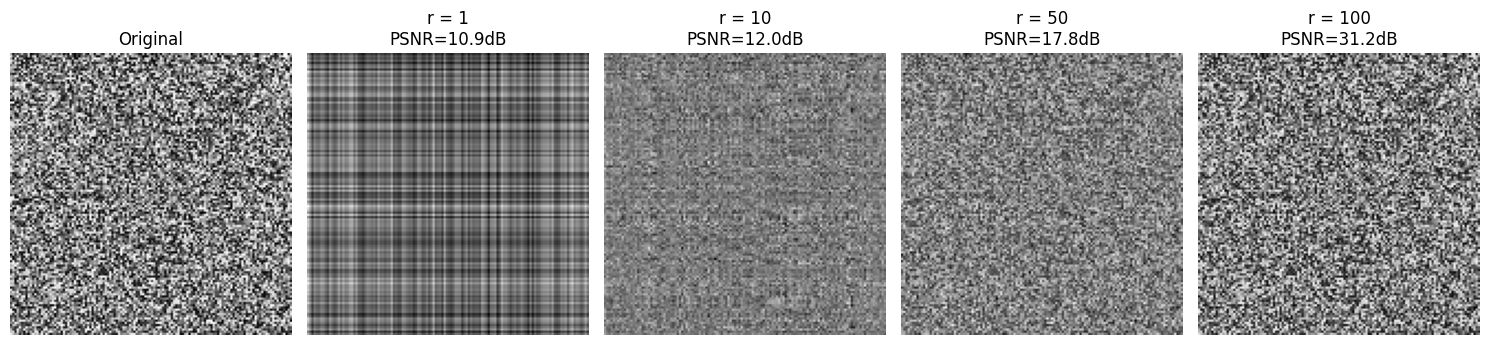

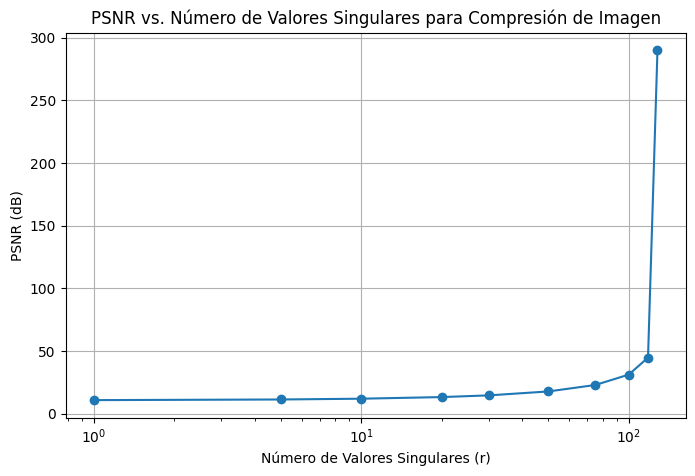

In [44]:
def calculate_psnr(img1, img2, max_pixel_value=255.0):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

#a) Cargar una imagen en escala de grises
try:
    print("Descargar una imagen de ejemplo (astronauta de scipy)...")
    response = requests.get("https://raw.githubusercontent.com/scipy/scipy-data/master/astronaut.png")
    response.raise_for_status() #Lanzar error si la descarga falla
    img_pil_color = Image.open(BytesIO(response.content))
    img_pil = img_pil_color.convert('L') #Convertir a escala de grises
    print("Imagen de ejemplo descargada y convertida a escala de grises.")

except FileNotFoundError:
    print(f"Error: Imagen no encontrada en la ruta especificada.")
    #Crear una imagen de prueba simple si falla la carga
    print("Creando una imagen de prueba aleatoria.")
    img_array_gray = np.random.randint(0, 256, (128, 128), dtype=np.uint8)
    img_pil = Image.fromarray(img_array_gray)
except Exception as e:
    print(f"Error al cargar o descargar imagen: {e}")
    print("Creando una imagen de prueba aleatoria.")
    img_array_gray = np.random.randint(0, 256, (128, 128), dtype=np.uint8)
    img_pil = Image.fromarray(img_array_gray)


img_array_gray = np.array(img_pil, dtype=float) #Convertir a array NumPy de floats para SVD

print(f"Dimensiones de la imagen: {img_array_gray.shape}")
max_pixel = 255.0 #Para imágenes de 8 bits

#b) Aplicar SVD
#A = U @ S_diag @ Vh
U, s_vec, Vh = np.linalg.svd(img_array_gray)

ranks_to_test = [1, 5, 10, 20, 30, 50, 75, 100, min(img_array_gray.shape)-10, min(img_array_gray.shape)] # r valores
psnr_values = []
reconstructed_images = []

print("\nReconstruyendo imagen con diferentes números de valores singulares (r):")
for r_rank in ranks_to_test:
    if r_rank > len(s_vec):
        r_rank = len(s_vec)
        print(f"  Ajustando r a {r_rank} (máximo disponible)")

    #Reconstruir la imagen usando los primeros 'r_rank' valores singulares
    img_reconstructed = U[:, :r_rank] @ (s_vec[:r_rank, np.newaxis] * Vh[:r_rank, :])

    reconstructed_images.append(img_reconstructed)

    #c) Calcular PSNR
    psnr = calculate_psnr(img_array_gray, img_reconstructed, max_pixel_value=max_pixel)
    psnr_values.append(psnr)
    print(f"  r = {r_rank:3d}, PSNR = {psnr:.2f} dB")
    if r_rank == ranks_to_test[-1] and psnr == float('inf'): #Si r = rank(A)
        print(f"  (PSNR es infinito para r={r_rank}, reconstrucción perfecta o muy cercana)")

#Graficar algunas imágenes reconstruidas
num_display = min(len(ranks_to_test), 4) #Mostrar hasta 4 reconstrucciones + original
plt.figure(figsize=(3 * (num_display + 1), 4))

plt.subplot(1, num_display + 1, 1)
plt.imshow(img_array_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

for i in range(num_display):
    idx_plot = ranks_to_test.index(sorted(ranks_to_test)[i*len(ranks_to_test)//num_display])
    plt.subplot(1, num_display + 1, i + 2)
    plt.imshow(reconstructed_images[idx_plot], cmap='gray')
    plt.title(f"r = {ranks_to_test[idx_plot]}\nPSNR={psnr_values[idx_plot]:.1f}dB")
    plt.axis('off')
plt.tight_layout()
plt.show()


#Graficar PSNR vs r
plt.figure(figsize=(8, 5))
plt.plot(ranks_to_test, psnr_values, 'o-')
plt.xlabel("Número de Valores Singulares (r)")
plt.ylabel("PSNR (dB)")
plt.title("PSNR vs. Número de Valores Singulares para Compresión de Imagen")
plt.grid(True)
plt.xscale('log')
plt.show()

### 13vo Ejercicio

In [45]:
#Generar datos sintéticos
num_samples_lm = 100
num_predictors = 3

#Coeficientes verdaderos (beta_0, beta_1, beta_2, beta_3)
beta_true = np.array([2.0, 1.5, -0.8, 0.5])

#Generar predictores X
X_data_no_intercept = np.random.rand(num_samples_lm, num_predictors) * 10 #Valores entre 0 y 10

#Crear la matriz de diseño X_design agregando una columna de unos para el intercepto
X_design = np.c_[np.ones(num_samples_lm), X_data_no_intercept]

#Generar la variable dependiente y con ruido gaussiano
noise_std = 0.5
epsilon_noise = np.random.normal(0, noise_std, num_samples_lm)
y_target = X_design @ beta_true + epsilon_noise

print(f"Datos generados: {num_samples_lm} muestras, {num_predictors} predictores.")
print(f"Coeficientes verdaderos (beta_0, beta_1, beta_2, beta_3): {beta_true}\n")

#Calcular beta usando la fórmula normal: beta_hat = (X.T @ X)^(-1) @ X.T @ y
try:
    XTX = X_design.T @ X_design
    XTX_inv = np.linalg.inv(XTX)
    XTy = X_design.T @ y_target
    beta_hat_normal_eq = XTX_inv @ XTy
    print("Coeficientes beta calculados con Fórmula Normal:")
    print(beta_hat_normal_eq)
except np.linalg.LinAlgError:
    print("Error: La matriz X.T @ X es singular, no se puede invertir.")
    print("Esto puede ocurrir si hay multicolinealidad perfecta.")
    beta_hat_normal_eq = None


#Comparar con np.linalg.lstsq
beta_hat_lstsq, residuals, rank, s_values = np.linalg.lstsq(X_design, y_target, rcond=None)

print("\nCoeficientes beta calculados con np.linalg.lstsq:")
print(beta_hat_lstsq)

if beta_hat_normal_eq is not None:
    print(f"\nComparación Fórmula Normal vs. lstsq:")
    print(f"  Son cercanos: {np.allclose(beta_hat_normal_eq, beta_hat_lstsq)}")


#Prueba con diferentes datos
print("\nPrueba con multicolinealidad (x3 = 2*x1):")
X_multicol = X_data_no_intercept.copy()
X_multicol[:, 2] = 2 * X_multicol[:, 0]
X_design_multicol = np.c_[np.ones(num_samples_lm), X_multicol]
y_target_multicol = X_design_multicol @ beta_true + np.random.normal(0, noise_std, num_samples_lm)

try:
    beta_multicol_normal = np.linalg.inv(X_design_multicol.T @ X_design_multicol) @ X_design_multicol.T @ y_target_multicol
    print("  Fórmula Normal (con multicolinealidad):", beta_multicol_normal)
except np.linalg.LinAlgError:
    print("  Fórmula Normal (con multicolinealidad): X.T @ X es singular.")

beta_multicol_lstsq, _, _, _ = np.linalg.lstsq(X_design_multicol, y_target_multicol, rcond=None)
print("  np.linalg.lstsq (con multicolinealidad):", beta_multicol_lstsq)

Datos generados: 100 muestras, 3 predictores.
Coeficientes verdaderos (beta_0, beta_1, beta_2, beta_3): [ 2.   1.5 -0.8  0.5]

Coeficientes beta calculados con Fórmula Normal:
[ 2.2466  1.474  -0.8222  0.5046]

Coeficientes beta calculados con np.linalg.lstsq:
[ 2.2466  1.474  -0.8222  0.5046]

Comparación Fórmula Normal vs. lstsq:
  Son cercanos: True

Prueba con multicolinealidad (x3 = 2*x1):
  Fórmula Normal (con multicolinealidad): X.T @ X es singular.
  np.linalg.lstsq (con multicolinealidad): [ 2.0932  0.4981 -0.8137  0.9962]


### 14vo Ejercicio

Dimensiones de A: (100, 5), w: (5,), b: (100,)
Learning rate: 0.001, Iteraciones: 2000
Costo inicial: 20.3364

Iteración | Costo
--------------------
        1 | 13.702933
      100 | 0.929330
      200 | 0.813239
      300 | 0.810361
      400 | 0.810278
      500 | 0.810275
      600 | 0.810274
      700 | 0.810274
      800 | 0.810274
      900 | 0.810274
     1000 | 0.810274
     1100 | 0.810274
     1200 | 0.810274
     1300 | 0.810274
     1400 | 0.810274
     1500 | 0.810274
     1600 | 0.810274
     1700 | 0.810274
     1800 | 0.810274
     1900 | 0.810274
     2000 | 0.810274

Descenso de gradiente finalizado.
w estimado por GD: [0.0838 0.1836 0.8152 0.3903 0.6437]
w estimado por np.linalg.lstsq: [0.0838 0.1836 0.8152 0.3903 0.6437]
Costo para w_lstsq: 0.810274

Son cercanos w_GD y w_lstsq? True


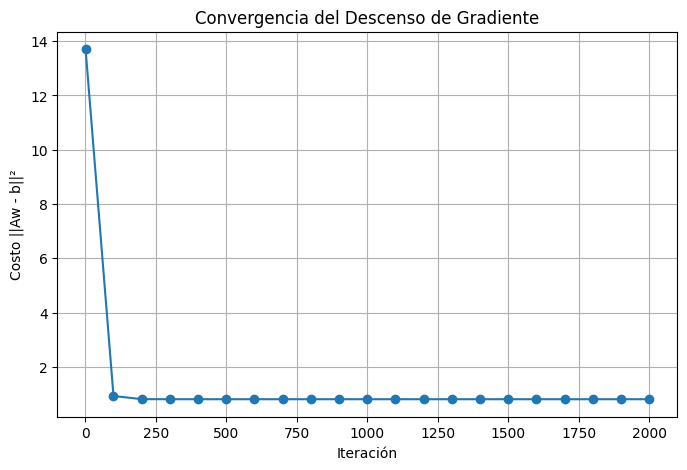

In [46]:
#Generar datos A y b
m_gd, n_gd = 100, 5 #100 muestras, 5 características
A_gd = np.random.rand(m_gd, n_gd)

#Generar w_true para crear b
w_true_gd = np.random.rand(n_gd)
b_gd = A_gd @ w_true_gd + np.random.normal(0, 0.1, m_gd) #A*w_true + ruido

#Parámetros del descenso de gradiente
learning_rate = 0.001 #Tasa de aprendizaje
num_iterations = 2000

#Inicializar w aleatoriamente
w_k = np.random.rand(n_gd)

#Función de costo f(w) = ||Aw - b||^2
def cost_function(A_mat, w_vec, b_vec):
    error = A_mat @ w_vec - b_vec
    return np.sum(error**2)

#Gradiente de f(w): ∇f(w) = 2 * A.T @ (A @ w - b)
def gradient(A_mat, w_vec, b_vec):
    error = A_mat @ w_vec - b_vec
    return 2 * A_mat.T @ error

#Almacenar el historial de errores
error_history = []
iteration_log_points = []

print(f"Dimensiones de A: {A_gd.shape}, w: {w_k.shape}, b: {b_gd.shape}")
print(f"Learning rate: {learning_rate}, Iteraciones: {num_iterations}")
initial_cost = cost_function(A_gd, w_k, b_gd)
print(f"Costo inicial: {initial_cost:.4f}\n")

print("Iteración | Costo")
print("--------------------")

#Bucle de descenso de gradiente
for i in range(num_iterations):
    grad_fw = gradient(A_gd, w_k, b_gd)
    w_k = w_k - learning_rate * grad_fw

    #Registrar el error/costo cada 100 iteraciones
    if (i + 1) % 100 == 0 or i == 0:
        current_cost = cost_function(A_gd, w_k, b_gd)
        error_history.append(current_cost)
        iteration_log_points.append(i + 1)
        print(f"{i+1:9d} | {current_cost:.6f}")
else:
    if num_iterations % 100 != 0 :
        current_cost = cost_function(A_gd, w_k, b_gd)
        error_history.append(current_cost)
        iteration_log_points.append(num_iterations)
        print(f"{num_iterations:9d} | {current_cost:.6f} (Final)")


print("\nDescenso de gradiente finalizado.")
print(f"w estimado por GD: {w_k}")

#Comparar con la solución de mínimos cuadrados (fórmula normal o lstsq)
w_lstsq_np, _, _, _ = np.linalg.lstsq(A_gd, b_gd, rcond=None)
print(f"w estimado por np.linalg.lstsq: {w_lstsq_np}")
cost_lstsq = cost_function(A_gd, w_lstsq_np, b_gd)
print(f"Costo para w_lstsq: {cost_lstsq:.6f}\n")

print(f"Son cercanos w_GD y w_lstsq? {np.allclose(w_k, w_lstsq_np, atol=1e-3)}")

#Graficar el error/costo
plt.figure(figsize=(8, 5))
plt.plot(iteration_log_points, error_history, 'o-')
plt.xlabel("Iteración")
plt.ylabel("Costo ||Aw - b||²")
plt.title("Convergencia del Descenso de Gradiente")
plt.grid(True)
plt.show()